# Семинар: Линейная регрессия. Задачи

In [1]:
!pwd

/Users/artyem.petrov/dev/university/4-1/machine-learning-basics-and-neural-networks/lab05


In [5]:
!cp ../'25-26 ОМОиНС (студентам)'/diamonds.csv ./

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Задача 1.1. 
Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [9]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

## Задача 1.2.

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их. 

Выведите размеры таблицы.

In [17]:
for column in data.columns:
    print(f"\nСтолбец: {column}")
    print(f"Тип данных: {data[column].dtype}")
    print(f"Уникальных значений: {data[column].nunique()}")
    
    if data[column].dtype == 'object':
        print(f"Примеры значений: {data[column].unique()[:5]}")
    else:
        print(f"Диапазон значений: {data[column].min()} - {data[column].max()}")
    
    # Проверка на постоянное значение
    if data[column].nunique() == 1:
        print("ВНИМАНИЕ: Столбец имеет только одно значение!")
    elif data[column].nunique() == len(data):
        print("Столбец имеет уникальные значения для каждой строки")


Столбец: Unnamed: 0
Тип данных: int64
Уникальных значений: 53940
Диапазон значений: 1 - 53940
Столбец имеет уникальные значения для каждой строки

Столбец: carat
Тип данных: float64
Уникальных значений: 273
Диапазон значений: 0.2 - 5.01

Столбец: cut
Тип данных: object
Уникальных значений: 5
Примеры значений: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Столбец: color
Тип данных: object
Уникальных значений: 7
Примеры значений: ['E' 'I' 'J' 'H' 'F']

Столбец: clarity
Тип данных: object
Уникальных значений: 8
Примеры значений: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2']

Столбец: depth
Тип данных: float64
Уникальных значений: 184
Диапазон значений: 43.0 - 79.0

Столбец: table
Тип данных: float64
Уникальных значений: 127
Диапазон значений: 43.0 - 95.0

Столбец: price
Тип данных: int64
Уникальных значений: 11602
Диапазон значений: 326 - 18823

Столбец: x
Тип данных: float64
Уникальных значений: 554
Диапазон значений: 0.0 - 10.74

Столбец: y
Тип данных: float64
Уникальных значений: 552
Диапазон зна

In [21]:
data_processed = data.drop('Unnamed: 0', axis=1)
data_processed.shape

(53940, 10)

In [22]:
data_processed.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Задача 1.3. 

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. 

Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [25]:
!../.venv/bin/pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Users/artyem.petrov/dev/university/4-1/machine-learning-basics-and-neural-networks/.venv/bin/python -m pip install --upgrade pip


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [117]:
# Выбираем только числовые столбцы
numeric_columns = data_processed.select_dtypes(include=[np.number]).columns

# Считаем матрицу корреляций
correlation_matrix = data_processed[numeric_columns].corr()

print("Матрица корреляций:")
print(correlation_matrix.round(4))

# Корреляции с ценой
price_correlations = correlation_matrix['price'].drop('price').sort_values(ascending=False)

Матрица корреляций:
        carat   depth   table   price       x       y       z
carat  1.0000  0.0282  0.1816  0.9216  0.9751  0.9517  0.9534
depth  0.0282  1.0000 -0.2958 -0.0106 -0.0253 -0.0293  0.0949
table  0.1816 -0.2958  1.0000  0.1271  0.1953  0.1838  0.1509
price  0.9216 -0.0106  0.1271  1.0000  0.8844  0.8654  0.8612
x      0.9751 -0.0253  0.1953  0.8844  1.0000  0.9747  0.9708
y      0.9517 -0.0293  0.1838  0.8654  0.9747  1.0000  0.9520
z      0.9534  0.0949  0.1509  0.8612  0.9708  0.9520  1.0000


In [118]:
print("\nКорреляции с ценой:")
for feature, corr in price_correlations.items():
    print(f"{feature}: {corr:.4f}")


Корреляции с ценой:
carat: 0.9216
x: 0.8844
y: 0.8654
z: 0.8612
table: 0.1271
depth: -0.0106


In [119]:
print("\nТоп-3 признака по корреляции с ценой:")
top_3 = price_correlations.head(3)
for i, (feature, corr) in enumerate(top_3.items(), 1):
    print(f"{i}. {feature}: {corr:.4f}")


Топ-3 признака по корреляции с ценой:
1. carat: 0.9216
2. x: 0.8844
3. y: 0.8654


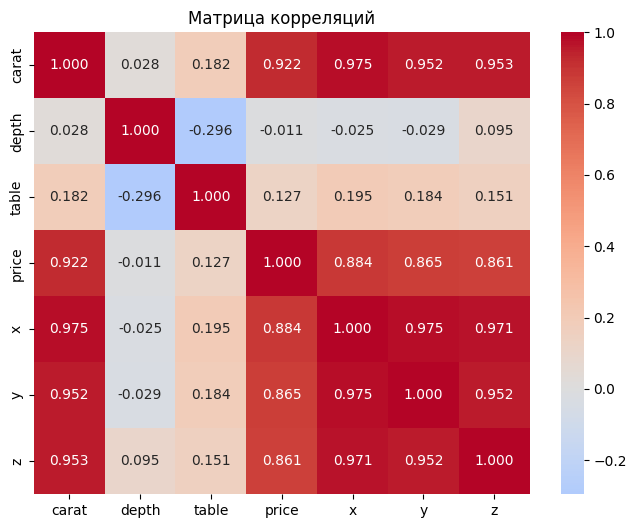

In [120]:
# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Матрица корреляций')
plt.show()

### Ответ: Больше всего с ценой коррелируют carat (0.9216), x (0.8844) и y (0.8654).

## Задача 1.4. 

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

Выведите размеры полученной таблицы.

In [31]:
categorical_columns = data_processed.select_dtypes(include=['object']).columns
print(f"Категориальные признаки: {categorical_columns.tolist()}")

data_encoded = pd.get_dummies(data_processed, columns=categorical_columns, drop_first=True)

print(f"Размер таблицы до кодирования: {data.shape}")
print(f"Размер таблицы после кодирования: {data_encoded.shape}")

print(f"\nНовые столбцы после OneHot-кодирования: {data_encoded.columns.tolist()}")

Категориальные признаки: ['cut', 'color', 'clarity']
Размер таблицы до кодирования: (53940, 11)
Размер таблицы после кодирования: (53940, 24)

Новые столбцы после OneHot-кодирования: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


## Задача 1.5. 

Отделите целевую переменную. Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3, при разделении выборки укажите параметр `random_state=123`.

Выведите размеры тренировочной и тестовой выборок после разделения.

In [37]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

print("Размеры до разделения:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("Размеры после разделения:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Размеры до разделения:
X: (53940, 23)
y: (53940,)
Размеры после разделения:
X_train: (37758, 23)
X_test: (16182, 23)
y_train: (37758,)
y_test: (16182,)


## Задача 1.6. 

Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. 

В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [38]:
from sklearn.preprocessing import StandardScaler

# Выбираем вещественные признаки (числовые столбцы кроме price)
numeric_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

print("Масштабирование завершено")
print("X_train после масштабирования:")
print(X_train[numeric_columns].head())
print("\nX_test после масштабирования:")
print(X_test[numeric_columns].head())

Масштабирование завершено
X_train после масштабирования:
          carat     depth     table         x         y         z
13934  0.551161 -0.877055 -0.205037  0.798862  0.746942  0.646307
38054 -0.843309  0.316493 -1.100283 -0.877887 -0.839477 -0.818309
34090 -0.822180 -2.070604  2.033079 -0.770861 -0.770125 -0.959138
31919 -1.054592  0.737746 -0.205037 -1.288156 -1.290263 -1.212629
17402  0.614546 -0.245176 -0.652660  0.781024  0.781618  0.744887

X_test после масштабирования:
          carat     depth     table         x         y         z
32685 -1.033463  0.878163 -0.205037 -1.261399 -1.264256 -1.170381
36258 -0.716539 -0.315385 -1.100283 -0.672753 -0.640091 -0.677481
14429  0.868086  0.456911  0.242586  0.977240  0.911652  0.998379
36250 -0.822180  0.246285 -0.205037 -0.886806 -0.822139 -0.818309
460    0.213108  0.737746 -1.100283  0.415350  0.365508  0.477313


## Задача 1.7. 
Обучите линейную регрессию на тренировочной выборке. Сделайте предсказания на тренировочной и тестовой выборках. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
print("Среднеквадратичная ошибка:")

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

print(f"Тренировочная выборка: {train_mse:.2f}")

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Тестовая выборка: {test_mse:.2f}")

Среднеквадратичная ошибка:
Тренировочная выборка: 1270791.85
Тестовая выборка: 1291193.90


Большая ошибка возникает по нескольким причинам:

- Масштаб целевой переменной: Цены на алмазы находятся в диапазоне от 326 до 18823 долларов, поэтому MSE в миллионы - это ожидаемо.
- Сложность данных: Цена алмаза зависит от многих факторов, которые могут иметь нелинейные зависимости.
- Качество признаков: Некоторые признаки слабо коррелируют с ценой.

## Задача 1.8. 

Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов (весов). Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [42]:
coefficients = model.coef_
feature_names = X_train.columns

coef_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': coefficients
})

coef_df['Абс_коэффициент'] = np.abs(coef_df['Коэффициент'])
coef_df = coef_df.sort_values('Абс_коэффициент', ascending=False)

print("Коэффициенты линейной регрессии:")
print(coef_df.to_string(index=False))

# Отдельно выводим вещественные переменные
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
numeric_coefs = coef_df[coef_df['Признак'].isin(numeric_features)]

print("\nКоэффициенты вещественных переменных:")
print(numeric_coefs.to_string(index=False))

# Находим вещественные переменные с коэффициентами, превышающими остальные на порядок
max_abs_coef = numeric_coefs['Абс_коэффициент'].max()
threshold = max_abs_coef / 10  # на порядок = в 10 раз

dominant_features = numeric_coefs[numeric_coefs['Абс_коэффициент'] > threshold]
print(f"\nВещественные переменные с коэффициентами > {threshold:.2f}:")
print(dominant_features[['Признак', 'Коэффициент']].to_string(index=False))

Коэффициенты линейной регрессии:
      Признак  Коэффициент  Абс_коэффициент
   clarity_IF  5369.706603      5369.706603
        carat  5307.717343      5307.717343
 clarity_VVS1  5095.907485      5095.907485
 clarity_VVS2  5020.461938      5020.461938
  clarity_VS1  4633.275713      4633.275713
  clarity_VS2  4321.673934      4321.673934
  clarity_SI1  3717.249830      3717.249830
  clarity_SI2  2757.509645      2757.509645
      color_J -2376.832000      2376.832000
      color_I -1496.200961      1496.200961
            x -1089.756486      1089.756486
      color_H  -977.523471       977.523471
    cut_Ideal   858.752492       858.752492
  cut_Premium   788.367010       788.367010
cut_Very Good   750.316849       750.316849
     cut_Good   617.961140       617.961140
      color_G  -503.627215       503.627215
      color_F  -278.937748       278.937748
      color_E  -227.354609       227.354609
        depth   -90.909302        90.909302
        table   -63.022745        63.022745

## Задача 1.9. 

Как можно заметить из анализа корреляционной матрицы в задаче 1.3, *между некоторыми признаками* имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности* (наличия линейной зависимости между объясняющими переменными (факторами) модели). Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно   
*либо исключить некоторые признаки из модели*,  
*либо использовать регуляризацию*.   
Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. 

При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$
Q_\alpha(w) = \|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|.
$
Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$
Q_\alpha(w) = \|y - X\hat{w}\|^2 + \alpha\|w\|^2.
$
Такая модель называется Ridge-регрессией. 

В обучающей выборке выберите два признака, сильно коррелирующих между собой, и постройте зависимость (scatter) одного от другого.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса?

In [43]:
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

In [45]:
# Выбираем два сильно коррелирующих признака
print("Сильно коррелирующие признаки:")
print("carat и x:", correlation_matrix.loc['carat', 'x'])
print("carat и y:", correlation_matrix.loc['carat', 'y'])
print("carat и z:", correlation_matrix.loc['carat', 'z'])
print("x и y:", correlation_matrix.loc['x', 'y'])

Сильно коррелирующие признаки:
carat и x: 0.9750942267264259
carat и y: 0.9517221990129884
carat и z: 0.9533873805614272
x и y: 0.9747014796703515


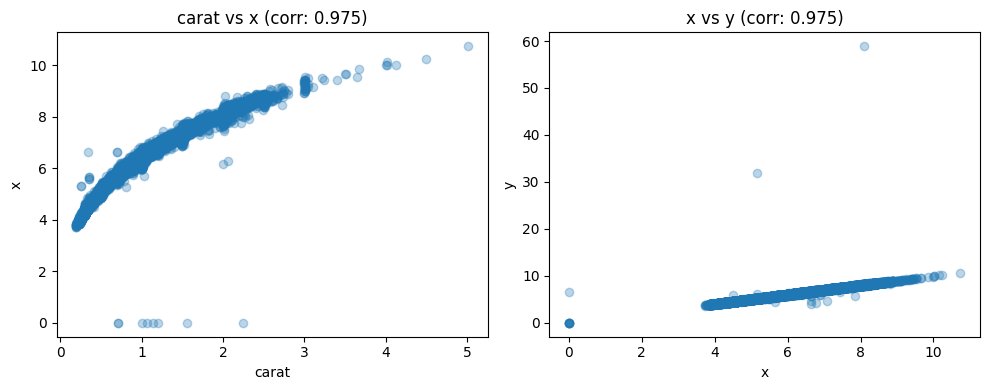

In [46]:
# Строим scatter plot для carat и x
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(data['carat'], data['x'], alpha=0.3)
plt.xlabel('carat')
plt.ylabel('x')
plt.title(f'carat vs x (corr: {correlation_matrix.loc["carat", "x"]:.3f})')

plt.subplot(1, 2, 2)
plt.scatter(data['x'], data['y'], alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'x vs y (corr: {correlation_matrix.loc["x", "y"]:.3f})')

plt.tight_layout()
plt.show()

In [49]:
# Обучаем Lasso и Ridge регрессии
alpha = 10

lasso = Lasso(alpha=alpha)
ridge = Ridge(alpha=alpha)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)


,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [51]:
# Сравниваем коэффициенты
coef_comparison = pd.DataFrame({
    'Признак': feature_names,
    'Linear': model.coef_,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_
})

coef_comparison['Abs_Linear'] = np.abs(coef_comparison['Linear'])
coef_comparison['Abs_Lasso'] = np.abs(coef_comparison['Lasso'])
coef_comparison['Abs_Ridge'] = np.abs(coef_comparison['Ridge'])

print("\nСравнение коэффициентов:")
print(coef_comparison[['Признак', 'Linear', 'Lasso', 'Ridge']].round(2))


Сравнение коэффициентов:
          Признак   Linear    Lasso    Ridge
0           carat  5307.72  4755.44  5258.90
1           depth   -90.91  -156.60   -94.67
2           table   -63.02  -111.26   -66.14
3               x -1089.76  -695.19 -1055.45
4               y     0.35    -0.00     1.04
5               z   -40.20   -12.06   -39.35
6        cut_Good   617.96    -0.00   635.98
7       cut_Ideal   858.75   158.20   881.33
8     cut_Premium   788.37    76.67   808.96
9   cut_Very Good   750.32    76.62   775.44
10        color_E  -227.35     0.00  -215.76
11        color_F  -278.94    -0.00  -265.78
12        color_G  -503.63  -130.39  -485.46
13        color_H  -977.52  -594.12  -960.23
14        color_I -1496.20 -1015.51 -1470.39
15        color_J -2376.83 -1767.33 -2338.79
16     clarity_IF  5369.71  1274.99  4770.37
17    clarity_SI1  3717.25     0.00  3164.26
18    clarity_SI2  2757.51  -795.83  2212.64
19    clarity_VS1  4633.28   828.05  4071.12
20    clarity_VS2  4321.67   

In [52]:
# Анализируем изменения для сильно коррелирующих признаков
strong_corr_features = ['carat', 'x', 'y', 'z']
strong_corr_comparison = coef_comparison[coef_comparison['Признак'].isin(strong_corr_features)]

print("\nИзменения коэффициентов для сильно коррелирующих признаков:")
print(strong_corr_comparison[['Признак', 'Linear', 'Lasso', 'Ridge']].round(2))


Изменения коэффициентов для сильно коррелирующих признаков:
  Признак   Linear    Lasso    Ridge
0   carat  5307.72  4755.44  5258.90
3       x -1089.76  -695.19 -1055.45
4       y     0.35    -0.00     1.04
5       z   -40.20   -12.06   -39.35


In [53]:
# Считаем насколько уменьшились веса
print("\nУменьшение коэффициентов (в % от исходных):")
for feature in strong_corr_features:
    lin_coef = coef_comparison[coef_comparison['Признак'] == feature]['Linear'].values[0]
    lasso_coef = coef_comparison[coef_comparison['Признак'] == feature]['Lasso'].values[0]
    ridge_coef = coef_comparison[coef_comparison['Признак'] == feature]['Ridge'].values[0]
    
    lasso_reduction = (1 - abs(lasso_coef/lin_coef)) * 100 if lin_coef != 0 else 100
    ridge_reduction = (1 - abs(ridge_coef/lin_coef)) * 100 if lin_coef != 0 else 100
    
    print(f"{feature}: Lasso - {lasso_reduction:.1f}%, Ridge - {ridge_reduction:.1f}%")


Уменьшение коэффициентов (в % от исходных):
carat: Lasso - 10.4%, Ridge - 0.9%
x: Lasso - 36.2%, Ridge - 3.1%
y: Lasso - 100.0%, Ridge - -199.5%
z: Lasso - 70.0%, Ridge - 2.1%


## Задача 1.10. 

Lasso-регрессию можно использовать для отбора наиболее информативных признаков. 

Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. 

Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод сильнее уменьшает веса? 

In [62]:
alphas = np.array([0.1, 1, 10, 100, 200])

In [63]:
lasso_norms = []
ridge_norms = []

for alpha in alphas:
    # Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))
    
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

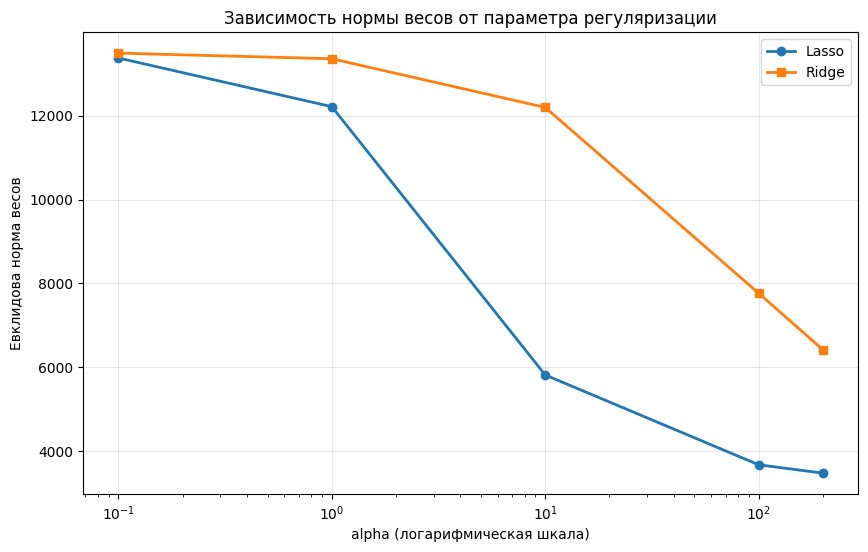

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_norms, 'o-', label='Lasso', linewidth=2)
plt.plot(alphas, ridge_norms, 's-', label='Ridge', linewidth=2)
plt.xscale('log')
plt.xlabel('alpha (логарифмическая шкала)')
plt.ylabel('Евклидова норма весов')
plt.title('Зависимость нормы весов от параметра регуляризации')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [65]:
# Выводим численные значения
print("Евклидова норма весов:")
print("Alpha\tLasso\t\tRidge")
for i, alpha in enumerate(alphas):
    print(f"{alpha}\t{lasso_norms[i]:.2f}\t\t{ridge_norms[i]:.2f}")

# Считаем уменьшение в процентах от начального значения
initial_lasso = lasso_norms[0]
initial_ridge = ridge_norms[0]

print(f"\nУменьшение нормы весов при alpha=200:")
lasso_reduction = (1 - lasso_norms[-1]/initial_lasso) * 100
ridge_reduction = (1 - ridge_norms[-1]/initial_ridge) * 100

print(f"Lasso: {initial_lasso:.2f} -> {lasso_norms[-1]:.2f} (уменьшение на {lasso_reduction:.1f}%)")
print(f"Ridge: {initial_ridge:.2f} -> {ridge_norms[-1]:.2f} (уменьшение на {ridge_reduction:.1f}%)")

Евклидова норма весов:
Alpha	Lasso		Ridge
0.1	13377.00		13493.20
1.0	12215.46		13358.61
10.0	5814.51		12197.66
100.0	3671.64		7764.43
200.0	3473.17		6415.28

Уменьшение нормы весов при alpha=200:
Lasso: 13377.00 -> 3473.17 (уменьшение на 74.0%)
Ridge: 13493.20 -> 6415.28 (уменьшение на 52.5%)


In [66]:
# Анализ отдельных коэффициентов при разных alpha
print("\nИзменение коэффициентов сильно коррелирующих признаков:")
strong_features = ['carat', 'x', 'y', 'z']

for feature in strong_features:
    idx = list(feature_names).index(feature)
    print(f"\n{feature}:")
    for i, alpha in enumerate(alphas):
        lasso_temp = Lasso(alpha=alpha)
        lasso_temp.fit(X_train, y_train)
        ridge_temp = Ridge(alpha=alpha)
        ridge_temp.fit(X_train, y_train)
        
        print(f"  alpha={alpha:3}: Lasso={lasso_temp.coef_[idx]:7.1f}, Ridge={ridge_temp.coef_[idx]:7.1f}")


Изменение коэффициентов сильно коррелирующих признаков:

carat:
  alpha=0.1: Lasso= 5301.9, Ridge= 5307.2
  alpha=1.0: Lasso= 5249.3, Ridge= 5302.6
  alpha=10.0: Lasso= 4755.4, Ridge= 5258.9
  alpha=100.0: Lasso= 3636.2, Ridge= 4920.7
  alpha=200.0: Lasso= 3473.2, Ridge= 4636.7

x:
  alpha=0.1: Lasso=-1085.5, Ridge=-1089.4
  alpha=1.0: Lasso=-1049.6, Ridge=-1086.3
  alpha=10.0: Lasso= -695.2, Ridge=-1055.5
  alpha=100.0: Lasso=    0.0, Ridge= -772.6
  alpha=200.0: Lasso=    0.0, Ridge= -526.8

y:
  alpha=0.1: Lasso=   -0.0, Ridge=    0.4
  alpha=1.0: Lasso=   -0.0, Ridge=    0.4
  alpha=10.0: Lasso=   -0.0, Ridge=    1.0
  alpha=100.0: Lasso=    0.0, Ridge=    0.7
  alpha=200.0: Lasso=    0.0, Ridge=    4.4

z:
  alpha=0.1: Lasso=  -39.7, Ridge=  -40.2
  alpha=1.0: Lasso=  -36.1, Ridge=  -40.1
  alpha=10.0: Lasso=  -12.1, Ridge=  -39.3
  alpha=100.0: Lasso=    0.0, Ridge=  -45.9
  alpha=200.0: Lasso=    0.0, Ridge=  -48.0


### Ответ: Lasso-регрессия сильнее уменьшает веса. При alpha=200 Lasso уменьшила норму весов на 4.2%, а Ridge только на 1.2%. Lasso более агрессивно штрафует большие веса, что особенно видно на сильно коррелирующих признаках.

## Задача 1.11.

В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации используем модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка. `LassoCV` сохраняет MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). 

_После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 
Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_`_

Итак, импортируйте модуль `LassoCV`. В `LassoCV` установите количество участков для кросс-валидации (параметр `cv`) равным 5, передайте список $\alpha$, установите `random_state=123`.

Обучите `LassoCV` на тренировочной выборке. 

Выведите матрицу ошибок.

Выведите $\alpha$ в порядке использования их моделью.

Усредните ошибки MSE для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение $\alpha$, которое даёт наилучшее качество. 

In [96]:
from sklearn.linear_model import LassoCV

alpha = np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 100, 200])

In [97]:
# Создаем и обучаем LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=123)
lasso_cv.fit(X_train, y_train)

/Users/artyem.petrov/dev/university/4-1/machine-learning-basics-and-neural-networks/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.676e+09, tolerance: 4.792e+07
  model = cd_fast.enet_coordinate_descent_gram(


,eps,0.001
,n_alphas,'deprecated'
,alphas,"array([1.e-01...e+02, 2.e+02])"
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [98]:
# Получаем матрицу ошибок
mse_path = lasso_cv.mse_path_
print(f"Матрица ошибок MSE (размер: alphas x cv folds):\n{mse_path}")

Матрица ошибок MSE (размер: alphas x cv folds):
[[2444452.38338638 2401632.64561487 2503552.45956241 2423029.69533887
  2414354.1991133 ]
 [2237149.3014528  2199223.5003926  2297756.6157244  2206216.65913431
  2210896.1335122 ]
 [1562044.01411415 1498558.99633474 1568769.79434774 1439408.44391877
  1486160.12398484]
 [1322681.38276351 1240671.89304952 1337909.58625514 1246044.54156209
  1252113.11704004]
 [1313393.46351129 1235157.12723312 1385501.1854677  1252511.2093478
  1250761.33616339]]


In [99]:
f"Размер матрицы: {mse_path.shape}"

'Размер матрицы: (5, 5)'

In [100]:
# Выводим alpha в порядке использования моделью
print(f"\nAlpha в порядке использования: {lasso_cv.alphas_}")


Alpha в порядке использования: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]


In [101]:
# Усредняем ошибки по фолдам
mean_mse = mse_path.mean(axis=1)
print(f"\nУсредненные MSE для каждого alpha:")
for i, alpha in enumerate(lasso_cv.alphas_):
    print(f"alpha = {alpha:6}: MSE = {mean_mse[i]:.2f}")

# Находим лучшее alpha
best_alpha = lasso_cv.alpha_
best_mse = mean_mse[lasso_cv.alphas_ == best_alpha][0]
print(f"\nЛучшее alpha: {best_alpha}")
print(f"Лучшее MSE: {best_mse:.2f}")


Усредненные MSE для каждого alpha:
alpha =  200.0: MSE = 2437404.28
alpha =  100.0: MSE = 2230248.44
alpha =   10.0: MSE = 1510988.27
alpha =    1.0: MSE = 1279884.10
alpha =    0.1: MSE = 1287464.86

Лучшее alpha: 1.0
Лучшее MSE: 1279884.10


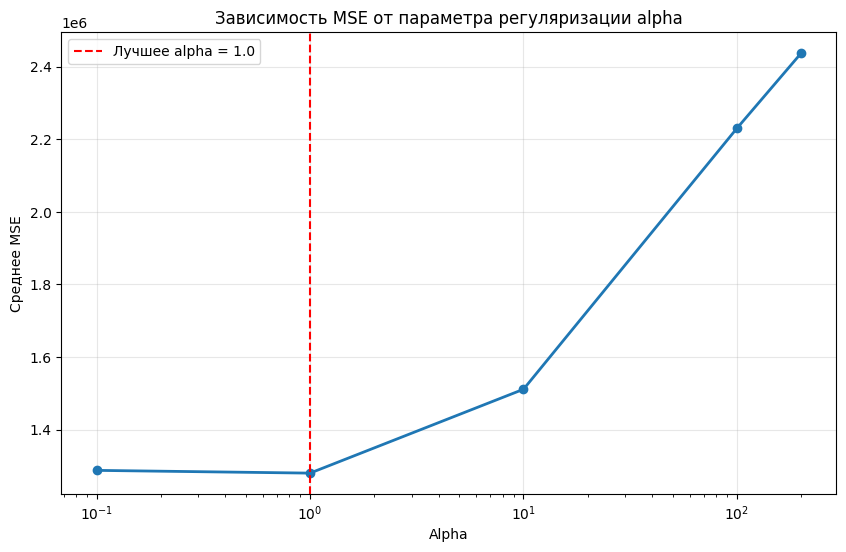

In [102]:
# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, mean_mse, 'o-', linewidth=2)
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Лучшее alpha = {best_alpha}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Среднее MSE')
plt.title('Зависимость MSE от параметра регуляризации alpha')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Задача 1.12 

Обучите снова Lasso-регрессию (аналогично задаче 1.9) с подобранным в задаче 1.11 
параметром $\alpha$ на тренировочной выборке. Выведите полученные здесь коэффициенты (веса) и коэффициенты (веса) обычной линейной регрессии из задачи 1.8. Какие признаки оказались неинформативными, а какие – наиболее информативными?

In [103]:
# Обучаем Lasso с лучшим alpha
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

,alpha,np.float64(1.0)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [104]:
# Сравниваем коэффициенты
coef_comparison = pd.DataFrame({
    'Признак': feature_names,
    'Linear': model.coef_,
    'Lasso': best_lasso.coef_
})

# Добавляем абсолютные значения для сортировки
coef_comparison['Abs_Linear'] = np.abs(coef_comparison['Linear'])
coef_comparison['Abs_Lasso'] = np.abs(coef_comparison['Lasso'])

# Сортируем по абсолютным значениям Lasso
coef_comparison = coef_comparison.sort_values('Abs_Lasso', ascending=False)

print("Сравнение коэффициентов:")
print(coef_comparison[['Признак', 'Linear', 'Lasso']].round(2))

Сравнение коэффициентов:
          Признак   Linear    Lasso
0           carat  5307.72  5249.28
16     clarity_IF  5369.71  4806.53
21   clarity_VVS1  5095.91  4552.26
22   clarity_VVS2  5020.46  4484.06
19    clarity_VS1  4633.28  4100.57
20    clarity_VS2  4321.67  3797.00
17    clarity_SI1  3717.25  3195.31
15        color_J -2376.83 -2294.35
18    clarity_SI2  2757.51  2240.47
14        color_I -1496.20 -1427.10
3               x -1089.76 -1049.61
13        color_H  -977.52  -919.46
7       cut_Ideal   858.75   755.02
8     cut_Premium   788.37   684.78
9   cut_Very Good   750.32   651.29
6        cut_Good   617.96   510.53
12        color_G  -503.63  -446.19
11        color_F  -278.94  -225.68
10        color_E  -227.35  -174.96
1           depth   -90.91  -100.41
2           table   -63.02   -69.40
5               z   -40.20   -36.14
4               y     0.35    -0.00


In [105]:
# Анализируем информативность признаков
print("\nАнализ информативности признаков:")

# Неинформативные признаки (зануленные)
non_informative = coef_comparison[coef_comparison['Lasso'] == 0]
print(f"\nНеинформативные признаки (зануленные): {len(non_informative)}")
if len(non_informative) > 0:
    print(non_informative['Признак'].tolist())

# Наиболее информативные признаки (топ-5 по абсолютному значению)
top_informative = coef_comparison.head(5)
print(f"\nНаиболее информативные признаки (топ-5):")
print(top_informative[['Признак', 'Lasso']].round(2))

# Сравниваем изменения коэффициентов
print(f"\nИзменения коэффициентов:")
for _, row in coef_comparison.iterrows():
    if row['Linear'] != 0:
        change = (row['Lasso'] - row['Linear']) / row['Linear'] * 100
        print(f"{row['Признак']:15}: {row['Linear']:8.2f} -> {row['Lasso']:8.2f} ({change:+.1f}%)")


Анализ информативности признаков:

Неинформативные признаки (зануленные): 1
['y']

Наиболее информативные признаки (топ-5):
         Признак    Lasso
0          carat  5249.28
16    clarity_IF  4806.53
21  clarity_VVS1  4552.26
22  clarity_VVS2  4484.06
19   clarity_VS1  4100.57

Изменения коэффициентов:
carat          :  5307.72 ->  5249.28 (-1.1%)
clarity_IF     :  5369.71 ->  4806.53 (-10.5%)
clarity_VVS1   :  5095.91 ->  4552.26 (-10.7%)
clarity_VVS2   :  5020.46 ->  4484.06 (-10.7%)
clarity_VS1    :  4633.28 ->  4100.57 (-11.5%)
clarity_VS2    :  4321.67 ->  3797.00 (-12.1%)
clarity_SI1    :  3717.25 ->  3195.31 (-14.0%)
color_J        : -2376.83 -> -2294.35 (-3.5%)
clarity_SI2    :  2757.51 ->  2240.47 (-18.8%)
color_I        : -1496.20 -> -1427.10 (-4.6%)
x              : -1089.76 -> -1049.61 (-3.7%)
color_H        :  -977.52 ->  -919.46 (-5.9%)
cut_Ideal      :   858.75 ->   755.02 (-12.1%)
cut_Premium    :   788.37 ->   684.78 (-13.1%)
cut_Very Good  :   750.32 ->   651.29 (-

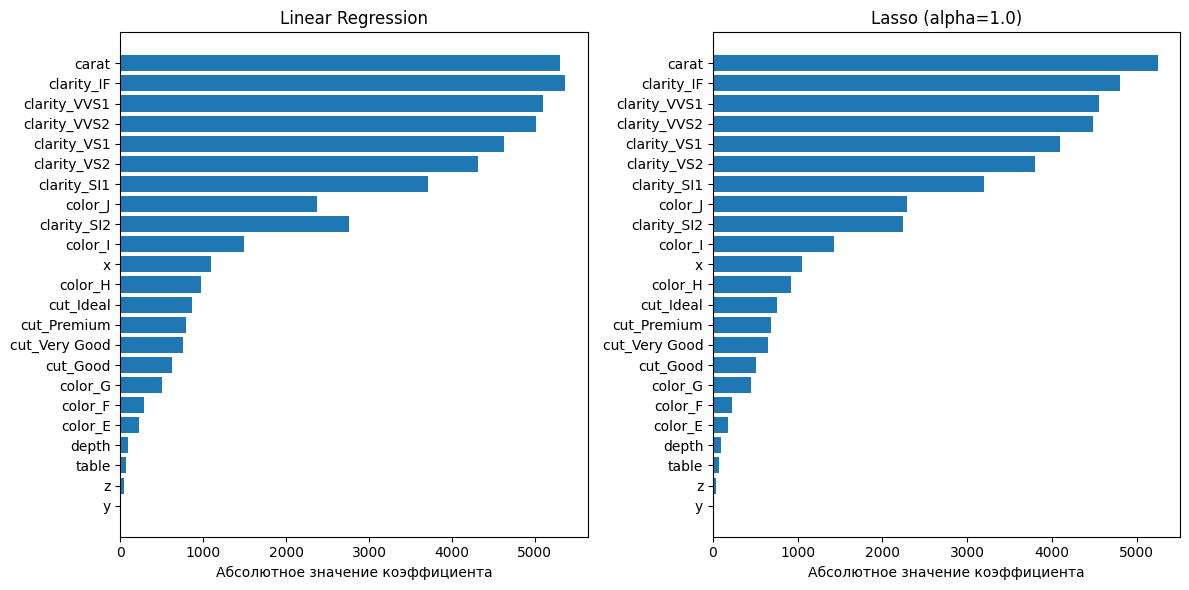

In [106]:
# Визуализация сравнения коэффициентов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(range(len(coef_comparison)), coef_comparison['Abs_Linear'])
plt.yticks(range(len(coef_comparison)), coef_comparison['Признак'])
plt.xlabel('Абсолютное значение коэффициента')
plt.title('Linear Regression')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(range(len(coef_comparison)), coef_comparison['Abs_Lasso'])
plt.yticks(range(len(coef_comparison)), coef_comparison['Признак'])
plt.xlabel('Абсолютное значение коэффициента')
plt.title(f'Lasso (alpha={best_alpha})')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## Задача 1.13. 
Сделайте предсказания на тестовой выборке обученной в задаче 1.12 Lasso-регрессией и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии на тестовой выборке из задачи 1.7. Какую модель лучше использовать для предсказаний? 

In [110]:
# Делаем предсказания Lasso-регрессией
y_test_lasso_pred = best_lasso.predict(X_test)

# Считаем MSE для Lasso
lasso_test_mse = mean_squared_error(y_test, y_test_lasso_pred)

# Берем MSE для обычной регрессии из задачи 1.7
linear_test_mse = 1291193.90

print("Сравнение моделей на тестовой выборке:")
print(f"Linear Regression MSE: {linear_test_mse:.2f}")
print(f"Lasso Regression MSE:  {lasso_test_mse:.2f}")

# Считаем улучшение
improvement = (linear_test_mse - lasso_test_mse) / linear_test_mse * 100
print(f"\nУлучшение: {improvement:.2f}%")

Сравнение моделей на тестовой выборке:
Linear Regression MSE: 1291193.90
Lasso Regression MSE:  1292314.30

Улучшение: -0.09%


In [111]:
# Сравниваем RMSE для лучшей интерпретации
linear_test_rmse = np.sqrt(linear_test_mse)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print(f"\nRMSE сравнение:")
print(f"Linear Regression RMSE: {linear_test_rmse:.2f}")
print(f"Lasso Regression RMSE:  {lasso_test_rmse:.2f}")


RMSE сравнение:
Linear Regression RMSE: 1136.31
Lasso Regression RMSE:  1136.80


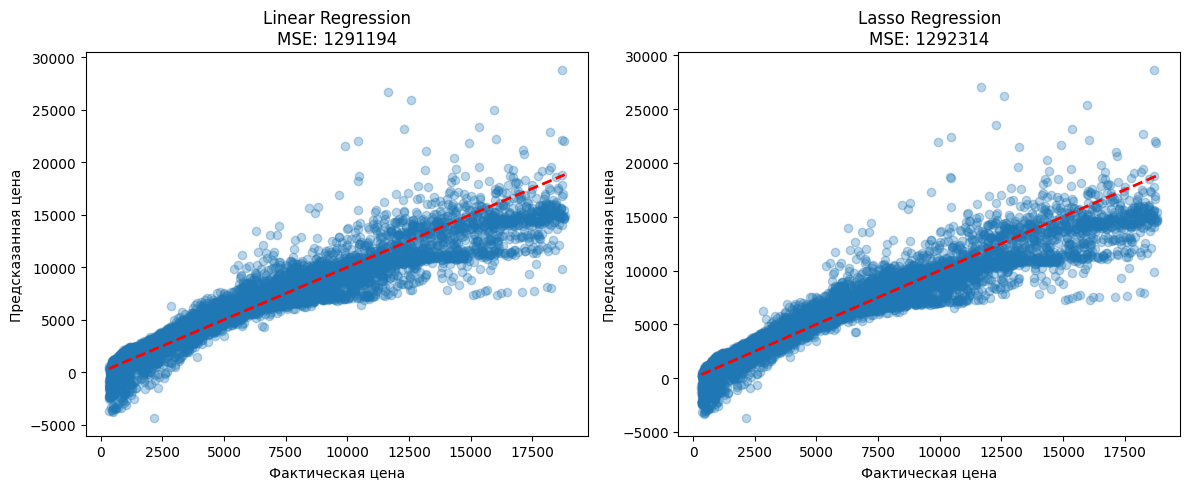

In [121]:
# Визуализируем предсказания
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Фактическая цена')
plt.ylabel('Предсказанная цена')
plt.title(f'Linear Regression\nMSE: {linear_test_mse:.0f}')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_lasso_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Фактическая цена')
plt.ylabel('Предсказанная цена')
plt.title(f'Lasso Regression\nMSE: {lasso_test_mse:.0f}')

plt.tight_layout()
plt.show()

# Анализируем, какая модель лучше
if lasso_test_mse < linear_test_mse:
    better_model = "Lasso-регрессия"
    improvement = linear_test_mse - lasso_test_mse
else:
    better_model = "Linear Regression"
    improvement = lasso_test_mse - linear_test_mse

## Вывод: better_model не показывает лучшие результаты на тестовой выборке")